In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('E:\Data Science\Yoshops-Internship\Tasks\EDA-project')
data = pd.read_csv("orders_2016-2020_Dataset.csv")
data.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [4]:
review = pd.read_csv("review_dataset.csv")
review.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [5]:
#to display all values in o/p 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
data.shape

(2297, 41)

In [7]:
data.isnull().sum()

Order #                               0
Order Date and Time Stamp             0
Fulfillment Status                    0
Payment Status                        0
Payment Date and Time Stamp        2057
Fulfillment Date and Time Stamp    2068
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         2296
Taxes                                 0
Total                                 0
Coupon Code                        2140
Coupon Code Name                   2140
Discount                              0
Billing Name                       1967
Billing Country                    1967
Billing Street Address             1967
Billing Street Address 2           2100
Billing City                       1967
Billing State                      1975
Billing Zip                        1967
Shipping Name                         0
Shipping Country                      0


In [8]:
data["Fulfillment Status"].value_counts()

Unfulfilled        1496
Cancelled           571
Fulfilled           229
Awaiting Pickup       1
Name: Fulfillment Status, dtype: int64

In [9]:
data = data.drop(columns=data.loc[:,(data.isnull().sum() >= 1900) & (data.columns !="Payment Method")].columns)
data.shape

(2297, 24)

In [10]:
data.isnull().sum()

Order #                         0
Order Date and Time Stamp       0
Fulfillment Status              0
Payment Status                  0
Currency                        0
Subtotal                        0
Shipping Method                 0
Shipping Cost                   0
Taxes                           0
Total                           0
Discount                        0
Shipping Name                   0
Shipping Country                0
Shipping Street Address        18
Shipping Street Address 2     771
Shipping City                  18
Shipping State                 21
Shipping Zip                   21
Payment Method               2057
LineItem Name                   0
LineItem SKU                   89
LineItem Qty                    0
LineItem Sale Price             0
LineItem Type                   0
dtype: int64

In [11]:
data[data["Shipping Street Address"].isnull()]

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Currency,Subtotal,Shipping Method,Shipping Cost,Taxes,Total,Discount,Shipping Name,Shipping Country,Shipping Street Address,Shipping Street Address 2,Shipping City,Shipping State,Shipping Zip,Payment Method,LineItem Name,LineItem SKU,LineItem Qty,LineItem Sale Price,LineItem Type
84,R550313418,04-11-2020 20:18:00 +0530,Unfulfilled,Unpaid,INR,₹ 999.00,In-Person Pickup,₹ 0.00,₹ 0.00,₹ 999.00,₹ 0.00,Venkatesh Shetty,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,PL0009821,1,₹ 999.00,physical
308,R393872801,24-10-2020 13:22:27 +0530,Unfulfilled,Unpaid,INR,₹ 299.00,In-Person Pickup,₹ 0.00,₹ 0.00,₹ 299.00,₹ 0.00,Anurag Nayak,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,QUECHUA Ultra-Compact Backpack10-Litre - Black,PL0009192,1,₹ 299.00,physical
611,R250169838,10-10-2020 22:26:19 +0530,Unfulfilled,Unpaid,INR,"₹ 1,499.00",In-Person Pickup,₹ 0.00,₹ 0.00,"₹ 1,499.00",₹ 0.00,Alaul Hoque,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Reliance Jio Phone,PL-JIO1,1,"₹ 1,499.00",physical
638,R976796340,09-10-2020 13:25:16 +0530,Unfulfilled,Unpaid,INR,"₹ 1,499.00",In-Person Pickup,₹ 0.00,₹ 0.00,"₹ 1,499.00",₹ 0.00,Shamsher bahadur Singh,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Reliance Jio Phone,PL-JIO1,1,"₹ 1,499.00",physical
757,R386802191,01-10-2020 16:54:57 +0530,Unfulfilled,Unpaid,INR,"₹ 4,497.00",In-Person Pickup,₹ 0.00,₹ 0.00,"₹ 4,497.00",₹ 0.00,Manish Rajpoot,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Reliance Jio Phone,PL-JIO1,3,"₹ 1,499.00",physical
815,R522387584,26-09-2020 11:02:13 +0530,Unfulfilled,Unpaid,INR,₹ 399.00,In-Person Pickup,₹ 0.00,₹ 0.00,₹ 399.00,₹ 0.00,Shivam Kumar,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Boat BassHeads 225 Super Extra Bass Headphone ...,PL0009343,1,₹ 399.00,physical
840,R052827700,23-09-2020 07:26:37 +0530,Unfulfilled,Unpaid,INR,"₹ 1,499.00",In-Person Pickup,₹ 0.00,₹ 0.00,"₹ 1,499.00",₹ 0.00,Sunil Verma,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Reliance Jio Phone,PL-JIO1,1,"₹ 1,499.00",physical
899,R466333331,15-09-2020 23:38:24 +0530,Unfulfilled,Unpaid,INR,"₹ 2,999.00",In-Person Pickup,₹ 0.00,₹ 0.00,"₹ 2,999.00",₹ 0.00,K JACKSON,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Reliance Jio Phone 2,PL980012,1,"₹ 2,999.00",physical
991,R487547857,31-08-2020 21:43:22 +0530,Unfulfilled,Unpaid,INR,₹ 399.00,In-Person Pickup,₹ 0.00,₹ 0.00,₹ 399.00,₹ 0.00,Nikhil Mandal,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,QUECHUA Mini Laptop Bag 10 Liter- Red/Black,18,1,₹ 399.00,physical
1075,R957588740,14-08-2020 09:48:53 +0530,Unfulfilled,Unpaid,INR,"₹ 2,999.00",In-Person Pickup,₹ 0.00,₹ 0.00,"₹ 2,999.00",₹ 0.00,Bhagirath Pawar,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,Reliance Jio Phone 2,PL980012,1,"₹ 2,999.00",physical


In [12]:
data["Shipping State"].value_counts()

IN-TN    287
IN-MH    263
IN-UP    225
IN-KA    144
IN-AN    138
IN-AP    126
IN-TG    122
IN-WB    102
IN-BR    100
IN-MP     92
IN-GJ     85
IN-DL     84
IN-RJ     79
IN-HR     71
IN-OR     57
IN-KL     49
IN-PB     48
IN-CT     37
IN-JH     36
IN-AS     31
IN-UT     19
IN-JK     17
IN-HP     12
IN-CH      9
IN-PY      9
IN-GA      9
IN-ML      4
IN-TR      3
IN-DN      3
IN-MN      3
IN-NL      2
AL         2
IN-MZ      2
IN         1
IN-AR      1
NY         1
IN-DD      1
TX         1
PE         1
Name: Shipping State, dtype: int64

In [13]:
data[data["Shipping State"] == "IN-AN"]

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Currency,Subtotal,Shipping Method,Shipping Cost,Taxes,Total,Discount,Shipping Name,Shipping Country,Shipping Street Address,Shipping Street Address 2,Shipping City,Shipping State,Shipping Zip,Payment Method,LineItem Name,LineItem SKU,LineItem Qty,LineItem Sale Price,LineItem Type
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Lucky Koli,IND,Nashik,Nashik,Maharashtra,IN-AN,422007,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,1,₹ 699.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Munna mumar Munna,IND,Nps thakur sthan Rajgir,NaN,X,IN-AN,S,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,1,₹ 699.00,physical
34,R436780750,07-11-2020 15:30:02 +0530,Cancelled,Paid,INR,₹ 999.00,Ships Free,₹ 0.00,₹ 0.00,₹ 999.00,₹ 0.00,Saheb Barik,IND,WestBangal,NaN,Purba Talla,IN-AN,721430,NaN,Samsung Level U Bluetooth Wireless in-Ear Head...,PL0000872,1,₹ 999.00,physical
42,R083615392,07-11-2020 08:41:45 +0530,Cancelled,Paid,INR,₹ 400.00,Ships Free,₹ 0.00,₹ 0.00,₹ 400.00,₹ 0.00,Amudala Anil,IND,gadhiryal,NaN,mahabubnagar,IN-AN,puttapahad,NaN,JBL Tempo On-Ear Headphone With Mic – J55iB (B...,27,1,₹ 400.00,physical
84,R550313418,04-11-2020 20:18:00 +0530,Unfulfilled,Unpaid,INR,₹ 999.00,In-Person Pickup,₹ 0.00,₹ 0.00,₹ 999.00,₹ 0.00,Venkatesh Shetty,IND,NaN,NaN,NaN,IN-AN,NaN,NaN,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,PL0009821,1,₹ 999.00,physical
89,R742161602,04-11-2020 17:28:59 +0530,Cancelled,Paid,INR,₹ 999.00,Ships Free,₹ 0.00,₹ 0.00,₹ 999.00,₹ 0.00,ujjwal prajapati,IND,7 2nd floor swastik super market,near sales india ashram road,ahmedabad,IN-AN,380009,NaN,Samsung Level U Bluetooth Wireless in-Ear Head...,PL0000872,1,₹ 999.00,physical
153,R561209258,01-11-2020 14:08:13 +0530,Cancelled,Paid,INR,₹ 140.00,Ships Free,₹ 0.00,₹ 0.00,₹ 140.00,₹ 0.00,Pandi Rajan,IND,5th Street,NaN,Tirupur,IN-AN,641607,NaN,1KG Chicken Biryani (Chennai),77,1,₹ 140.00,physical
155,R102352320,01-11-2020 14:00:15 +0530,Cancelled,Paid,INR,₹ 140.00,Ships Free,₹ 0.00,₹ 0.00,₹ 140.00,₹ 0.00,Pandi Rajan,IND,5th Street,NaN,Tirupur,IN-AN,641607,NaN,1KG Chicken Biryani (Chennai),77,1,₹ 140.00,physical
171,R477125005,31-10-2020 19:58:49 +0530,Unfulfilled,Unpaid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Smrutiranjan Sahoo,IND,Belabahali,Bus stop near,Kendujhar,IN-AN,758020,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,1,₹ 699.00,physical
228,R393720042,28-10-2020 12:20:17 +0530,Unfulfilled,Unpaid,INR,₹ 899.00,Ships Free,₹ 0.00,₹ 0.00,₹ 899.00,₹ 0.00,vinay sharma,IND,TRB Exports,sua road dhandari kalan,ludhiana,IN-AN,141014,NaN,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,PL0009821,1,₹ 899.00,physical


In [14]:
data["Shipping State"] = data["Shipping State"].fillna('Data Not Available')
data["Shipping City"] = data["Shipping City"].fillna('Data Not Available')
data["Shipping Zip"] = data["Shipping Zip"].fillna('Data Not Available')
data["LineItem SKU"] = data["LineItem SKU"].fillna('Data Not Available')
data["Shipping Street Address"] = data["Shipping Street Address"].fillna('Data Not Available')
data["Shipping Street Address 2"] = data["Shipping Street Address 2"].fillna('Data Not Available')
data["Payment Method"] = data["Payment Method"].fillna('Data Not Available')

In [15]:
data.isnull().sum()

Order #                      0
Order Date and Time Stamp    0
Fulfillment Status           0
Payment Status               0
Currency                     0
Subtotal                     0
Shipping Method              0
Shipping Cost                0
Taxes                        0
Total                        0
Discount                     0
Shipping Name                0
Shipping Country             0
Shipping Street Address      0
Shipping Street Address 2    0
Shipping City                0
Shipping State               0
Shipping Zip                 0
Payment Method               0
LineItem Name                0
LineItem SKU                 0
LineItem Qty                 0
LineItem Sale Price          0
LineItem Type                0
dtype: int64

In [16]:
review.isnull().sum()

product_name       0
product_url        0
category           0
status          1255
stars           1255
dtype: int64

In [17]:
review["status"] = review["status"].fillna('Not Reviewed')
review["stars"] = review["stars"].fillna('0.0')
review["stars"] = review["stars"].str.replace(" star rating","")

In [18]:
review["stars"] = review["stars"].astype("float64")

In [19]:
data["Payment Method"].value_counts()

Data Not Available                                      2057
Offline Payment ₹1,499.00                                 18
Offline Payment ₹1,999.00                                 10
Offline Payment ₹799.00                                   10
Offline Payment ₹300.00                                    9
Offline Payment ₹1,399.00                                  8
Offline Payment ₹38,519.00                                 7
Offline Payment ₹1,199.00                                  7
Offline Payment ₹999.00                                    7
Offline Payment ₹35,774.00                                 6
Offline Payment ₹299.00                                    5
Offline Payment ₹2,199.00                                  5
CCAvenue ₹1,299.00                                         5
CCAvenue ₹1,399.00                                         5
Offline Payment ₹899.00                                    4
Offline Payment ₹5,999.00                                  4
Offline Payment ₹46,166.

In [20]:
def payment(x):
    payData = x.split('₹')
    if (len(payData) !=1):
        return payData[1]
    else:
        return 0
    
def paymentMethod(x):
    payData = x.split('₹')
    return payData[0]

In [21]:
data["Payment"] = data["Payment Method"].apply(payment)
data["Payment Method"] = data["Payment Method"].apply(paymentMethod)

In [22]:
data["Payment"] = data["Payment"].str.replace(';Offline Payment -','')

In [23]:
data.isnull().sum()

Order #                         0
Order Date and Time Stamp       0
Fulfillment Status              0
Payment Status                  0
Currency                        0
Subtotal                        0
Shipping Method                 0
Shipping Cost                   0
Taxes                           0
Total                           0
Discount                        0
Shipping Name                   0
Shipping Country                0
Shipping Street Address         0
Shipping Street Address 2       0
Shipping City                   0
Shipping State                  0
Shipping Zip                    0
Payment Method                  0
LineItem Name                   0
LineItem SKU                    0
LineItem Qty                    0
LineItem Sale Price             0
LineItem Type                   0
Payment                      2057
dtype: int64

In [24]:
data["Payment"].value_counts()

1,499.00     23
1,399.00     14
799.00       13
300.00       11
1,999.00     10
1,199.00      7
999.00        7
38,519.00     7
35,774.00     6
299.00        6
2,199.00      6
1,299.00      5
269.00        4
899.00        4
1,596.00      4
400.00        4
349.00        4
1,099.00      4
46,166.00     4
800.00        4
5,999.00      4
369.00        3
43,168.00     3
200.00        3
37,972.00     3
2,099.00      3
749.00        3
250.00        3
22,064.67     3
2,798.00      2
19,576.00     2
1,700.00      2
10,198.00     2
22,980.00     2
3,298.00      2
499.00        2
35,976.00     2
100.00        2
150.00        2
44,970.00     2
199.00        2
849.00        2
22,485.00     1
500.00        1
12,500.00     1
20,238.75     1
1,799.00      1
1,166.10      1
10,398.00     1
1,050.00      1
522.50        1
1,095.00      1
4,599.00      1
249.00        1
10,500.00     1
3,399.00      1
15,597.00     1
140.00        1
340.00        1
449.00        1
1,599.00      1
6,999.00      1
549.00  

In [25]:
data["Payment"] =data["Payment"].fillna(0.00)

In [26]:
data["Payment Method"].unique()

array(['Data Not Available', 'CCAvenue ', 'Offline Payment '],
      dtype=object)

In [27]:
def enter2():
    plt.figure(figsize = [9,7])
    mylables = ['Data Not Available','Offline Payment', 'CCAvenue']
    plt.pie(data["Payment Method"].value_counts(),startangle=90,labels = mylables,autopct='%1.0f%%')
    plt.title('Payment Pathods')
    plt.legend()
    plt.savefig("report/PaymentMethod_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [28]:
data.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Currency,Subtotal,Shipping Method,Shipping Cost,Taxes,Total,Discount,Shipping Name,Shipping Country,Shipping Street Address,Shipping Street Address 2,Shipping City,Shipping State,Shipping Zip,Payment Method,LineItem Name,LineItem SKU,LineItem Qty,LineItem Sale Price,LineItem Type,Payment
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,INR,₹ 799.00,Ships Free,₹ 0.00,₹ 0.00,₹ 799.00,₹ 0.00,Neetu Yadav,IND,"Sec-86 nawada fatehpur, postoffice-Sikanderpur...",Data Not Available,Gurgaon,IN-HR,122004,Data Not Available,Boat Rockerz 530 Bluetooth Headphone with Mic ...,Data Not Available,1,₹ 799.00,physical,0.0
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Lucky Koli,IND,Nashik,Nashik,Maharashtra,IN-AN,422007,Data Not Available,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,1,₹ 699.00,physical,0.0
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,INR,₹ 799.00,Ships Free,₹ 0.00,₹ 0.00,₹ 799.00,₹ 0.00,Raghu A,IND,Madhuranagar 2nd stage hostel,Rbw apartment,Bangalore,IN-KA,560087,Data Not Available,Boat Rockerz 530 Bluetooth Headphone with Mic ...,Data Not Available,1,₹ 799.00,physical,0.0
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,INR,₹ 599.00,Ships Free,₹ 0.00,₹ 0.00,₹ 599.00,₹ 0.00,Hemant Vaishnav,IND,Civil line near lic office,Data Not Available,Merta City nagaur,IN-RJ,Gfj gang do DG Haldighati usually Jan,Data Not Available,JBL Tempo On-Ear Headphone,PL000157,1,₹ 599.00,physical,0.0
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Munna mumar Munna,IND,Nps thakur sthan Rajgir,Data Not Available,X,IN-AN,S,Data Not Available,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,1,₹ 699.00,physical,0.0


In [29]:
data["Shipping State"].value_counts()

IN-TN                 287
IN-MH                 263
IN-UP                 225
IN-KA                 144
IN-AN                 138
IN-AP                 126
IN-TG                 122
IN-WB                 102
IN-BR                 100
IN-MP                  92
IN-GJ                  85
IN-DL                  84
IN-RJ                  79
IN-HR                  71
IN-OR                  57
IN-KL                  49
IN-PB                  48
IN-CT                  37
IN-JH                  36
IN-AS                  31
Data Not Available     21
IN-UT                  19
IN-JK                  17
IN-HP                  12
IN-CH                   9
IN-PY                   9
IN-GA                   9
IN-ML                   4
IN-MN                   3
IN-DN                   3
IN-TR                   3
IN-NL                   2
AL                      2
IN-MZ                   2
IN                      1
IN-AR                   1
NY                      1
IN-DD                   1
TX          

In [30]:
def enter3():
    plt.figure(figsize=(15,15))
    data['Shipping State'].value_counts().plot.bar()
    plt.title('Popular State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.savefig("report/PopularState_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

def enter4():
    plt.figure(figsize=(15,250))
    data['Shipping City'].value_counts().plot.barh()
    plt.title('Popular City')
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.savefig("report/PopularCity_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [31]:
data['Shipping City'].value_counts()

Chennai                                            81
Bangalore                                          54
Hyderabad                                          50
Mumbai                                             44
Varanasi                                           41
Pune                                               29
chennai                                            29
Gorakhpur                                          22
Delhi                                              21
Kolkata                                            21
Ahmedabad                                          20
Patna                                              18
Data Not Available                                 18
New Delhi                                          18
Coimbatore                                         16
CHENNAI                                            16
Lucknow                                            12
Noida                                              12
Faridabad                   

In [32]:
data['Shipping City'] = data['Shipping City'].apply(lambda x : x.lower())
data['Shipping City'] = data['Shipping City'].str.replace('chennai 600009','chennai')
data['Shipping City'] = data['Shipping City'].str.replace('hyderabad telangana','hyderabad')
data['Shipping City'] = data['Shipping City'].str.replace('chenai','chennai')
data['Shipping City'] = data['Shipping City'].str.replace('mumbai,vikhroli','mumbai')

In [33]:
data['Shipping City'].value_counts()

chennai                                            128
bangalore                                           66
hyderabad                                           59
mumbai                                              53
varanasi                                            42
pune                                                35
new delhi                                           35
delhi                                               30
kolkata                                             28
ahmedabad                                           24
gorakhpur                                           23
patna                                               20
coimbatore                                          20
data not available                                  18
jaipur                                              15
faridabad                                           14
visakhapatnam                                       13
salem                                               13
surat     

In [36]:
lstCity = data['Shipping City'].unique()

In [37]:
def cityFilter(x):
    city = x.split(' ')
    if(len(city) > 1):
        return city[0]
    return 0

In [38]:
lstMainCity = []
for i in lstCity:
    ct = cityFilter(i)
    if  ct != 0:
        lstMainCity.append(ct)

In [39]:
lstMainCity

['merta',
 'dammapeta',
 'tehsil',
 'purba',
 'navi',
 'mumbai',
 'data',
 'chennai',
 'village',
 'new',
 'gonda',
 'naini',
 'bari',
 'lota',
 'south',
 'chanditala,',
 'sri',
 'jahangir',
 'virar',
 'bangalore',
 'panipat',
 'janki',
 'kalwa',
 'port',
 'q',
 'gangapur',
 'andhra',
 'sawai',
 'peddapalli,',
 'bhavnath',
 'hi',
 'pune',
 'dk',
 'new',
 'katangi',
 'udaipur',
 'ncl',
 'talwandi',
 'pangra',
 'preeti',
 'kodumudi,',
 'navi',
 'muradnagar,',
 'vashi,',
 'chauth',
 'pedda',
 'tirora,',
 'old',
 'airoli',
 'greater',
 'kanpur',
 'jajpur',
 'new',
 'chamba',
 'mumbai',
 'kadapa',
 'मरवटिया',
 'mehrauli',
 'new',
 'harmu',
 'imphal',
 'kirti',
 'om',
 'old',
 'old',
 'bangalore',
 'gautam',
 'gollapudi,',
 'dhar',
 'kalwa',
 'nanded',
 'badhan',
 'b',
 'siddhartha',
 'madhya',
 'west',
 'ranga',
 'uttam',
 'meerut',
 'bangalore',
 'patna',
 'rayagada',
 'chomu',
 'jorhat',
 'bikaner',
 'post',
 'maruti',
 'khedbrahma,',
 'bharwa',
 'yamuna',
 'uruli',
 '148/a',
 'baloda',
 

In [40]:
def clearSpaceProgramCity(x):
    city = x.split(' ')
    cityChange = False
    if len(city) > 1:
        for i in city:
            for j in lstMainCity:
                if i == j:
                    city = j
                    cityChange = True
                    break
    if cityChange ==True:
        return city
    else:
        strCity = ''
        for ele in city: 
            strCity += ele + ' '
        return strCity

In [41]:
data['Shipping City'] = data['Shipping City'].apply(clearSpaceProgramCity)
data['Shipping City'] = data['Shipping City'].apply(lambda x: x.strip())
data['Shipping City'] =data['Shipping City'].str.replace("chennai-600113","chennai")
data['Shipping City'] =data['Shipping City'].str.replace("delhi.110092","delhi")

In [42]:
data['Shipping City'].value_counts()

chennai                  132
delhi                     69
bangalore                 68
mumbai                    65
hyderabad                 61
varanasi                  42
pune                      37
kolkata                   28
ahmedabad                 24
gorakhpur                 23
patna                     21
coimbatore                20
data                      18
jaipur                    15
faridabad                 14
lucknow                   13
visakhapatnam             13
salem                     13
surat                     13
noida                     13
ludhiana                  12
gurgaon                   12
bhopal                    11
thane                     11
bhubaneswar               10
vijayawada                10
bengaluru                 10
nizamabad                 10
ranchi                    10
madurai                   10
indore                    10
gaya                       9
kanpur                     9
nagpur                     9
chandigarh    

In [43]:
data["LineItem Name"].value_counts()

Reliance Jio Phone                                                                                                                     285
boAT Airdopes X3 Bass Wireless Earbuds with Charging Case (White)                                                                      131
Boat Rockerz 255 Wireless Bluetooth Headset with Mic (Black)                                                                           122
Sony PlayStation 2 Gaming Console PS2 150 GB Hard Disk With 50 Games Preloaded(Black)                                                  117
Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones                                               83
Reliance Jio Phone 2                                                                                                                    81
Boat Rockerz 530 Bluetooth Headphone with Mic (Carbon Black)                                                                            79
Vmax HX 750 Quadcopter Dron

In [44]:
def enter5():
    plt.figure(figsize=(15,250))
    data['LineItem Name'].value_counts().plot.barh()
    plt.title('Popular Product')
    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.savefig("report/PopularProduct_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [45]:
data.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Currency,Subtotal,Shipping Method,Shipping Cost,Taxes,Total,Discount,Shipping Name,Shipping Country,Shipping Street Address,Shipping Street Address 2,Shipping City,Shipping State,Shipping Zip,Payment Method,LineItem Name,LineItem SKU,LineItem Qty,LineItem Sale Price,LineItem Type,Payment
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,INR,₹ 799.00,Ships Free,₹ 0.00,₹ 0.00,₹ 799.00,₹ 0.00,Neetu Yadav,IND,"Sec-86 nawada fatehpur, postoffice-Sikanderpur...",Data Not Available,gurgaon,IN-HR,122004,Data Not Available,Boat Rockerz 530 Bluetooth Headphone with Mic ...,Data Not Available,1,₹ 799.00,physical,0.0
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Lucky Koli,IND,Nashik,Nashik,maharashtra,IN-AN,422007,Data Not Available,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,1,₹ 699.00,physical,0.0
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,INR,₹ 799.00,Ships Free,₹ 0.00,₹ 0.00,₹ 799.00,₹ 0.00,Raghu A,IND,Madhuranagar 2nd stage hostel,Rbw apartment,bangalore,IN-KA,560087,Data Not Available,Boat Rockerz 530 Bluetooth Headphone with Mic ...,Data Not Available,1,₹ 799.00,physical,0.0
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,INR,₹ 599.00,Ships Free,₹ 0.00,₹ 0.00,₹ 599.00,₹ 0.00,Hemant Vaishnav,IND,Civil line near lic office,Data Not Available,merta,IN-RJ,Gfj gang do DG Haldighati usually Jan,Data Not Available,JBL Tempo On-Ear Headphone,PL000157,1,₹ 599.00,physical,0.0
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,INR,₹ 699.00,Ships Free,₹ 0.00,₹ 0.00,₹ 699.00,₹ 0.00,Munna mumar Munna,IND,Nps thakur sthan Rajgir,Data Not Available,x,IN-AN,S,Data Not Available,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,1,₹ 699.00,physical,0.0


In [46]:
data["Order Date and Time Stamp"][0]

'09-11-2020 20:36:26 +0530'

In [47]:
data["Order Date"] = data["Order Date and Time Stamp"].apply(lambda x:x.split(' ')[0])
data["Order Time"] = data["Order Date and Time Stamp"].apply(lambda x:x.split(' ')[1])
data["Order TimeStamp"] = data["Order Date and Time Stamp"].apply(lambda x:x.split(' ')[2])

In [48]:
data = data.drop(columns = ['Order Date and Time Stamp'])

In [49]:
data["Order Date"] = pd.to_datetime(data["Order Date"],format='%d-%m-%Y')

In [50]:
data["Order Year"]  = pd.DatetimeIndex(data["Order Date"]).year
data["Order Month"]  = pd.DatetimeIndex(data["Order Date"]).month

In [51]:
data[["Order Year","Order Month"]].value_counts()

Order Year  Order Month
2020        10             600
            9              224
            11             167
            7              163
            8              156
            6              123
            5               78
            3               69
            4               46
2016        10              46
2017        4               38
2018        8               38
            9               29
            7               28
            10              28
            3               27
2019        5               25
2018        11              23
2019        1               22
2020        2               20
2019        3               20
2018        2               19
2019        10              19
            4               18
            9               17
            2               16
2018        5               16
2019        11              16
            6               16
            7               15
            12              13
2018        6  

In [52]:
data["Order Year"].value_counts()


2020    1655
2018     251
2019     210
2017     118
2016      63
Name: Order Year, dtype: int64

In [53]:
def enter7():
    plt.figure(figsize = [9,7])
    mylables = ['2020','2018', '2019','2017',2016]
    plt.pie(data["Order Year"].value_counts(),startangle=90,labels = mylables,autopct='%1.0f%%')
    plt.title('Yearwise Order')
    plt.legend()
    plt.savefig("report/Yearwise_order_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [54]:
def enter8():
    fig = px.bar(data, x="Order Month",y="Order Year",color="Order Year", title="Order MonthWise Analysis")
    fig.write_image("report/orderMonthWise.pdf")
    fig.show()

In [55]:
review.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9


In [56]:
review.stars.value_counts()

0.0    1255
5.0     499
4.9      33
4.5      16
4.8      13
4.7       8
4.6       7
4.3       7
4.2       7
3.0       6
4.0       4
2.3       4
3.3       2
Name: stars, dtype: int64

In [57]:
def reviewRank(x):
    if x >= 3.0:
        return "Positive"    
    else:
        return "Negative"


In [58]:
review["reviewRank"] = review.stars.apply(reviewRank)

In [59]:
review.head()

,product_name,product_url,category,status,stars,reviewRank
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0,Positive
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0,Positive
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0,Positive
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9,Positive
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9,Positive


In [60]:
def enter1():    
    labels = ["Reviewed","Not Reviewed"]
    colors = sns.color_palette('pastel')[0:2]
    plt.pie(review.status.value_counts(), labels = labels, colors = colors, autopct='%.0f%%',explode=[0.05]*2)
    plt.savefig("report/Reviews_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [61]:
dfCat = pd.pivot_table(data = review, values = "stars",index="category",columns = "reviewRank",aggfunc = np.mean)
dfCat

reviewRank,Negative,Positive
category,,
Accessories,0.000000,4.919231
Auto spare parts,0.000000,5.000000
Bags,0.000000,5.000000
Bengaluru,0.000000,4.990000
Biryani,0.000000,5.000000
Blog Sponsorship,0.000000,5.000000
Books,0.000000,NaN
Chennai,0.000000,4.990000
Computers Accessories,0.000000,4.950000


In [62]:
def enter6():
    plt.figure(figsize = (30,15))
    sns.heatmap(dfCat,annot=True)
    plt.title('to see the analysis of Reviews for All Product Categories')
    plt.savefig("report/Review_product_category_report.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [63]:
def enter9():
    fig = px.bar(data, x="LineItem Name",y="Order Year",color="Order Year", title="Order MonthWise Analysis")
    fig.write_image("report/ProductMonthWise.pdf")
    fig.show()

In [66]:
print(""" Create EDA using Test Data file(Yoshops.com Sale Order file) :
Input Value for genrate Graph chart:
Enter 1 to see the analysis of Reviews given by Customers
Enter 2 to see the analysis of different payment methods used by the Customers
Enter 3 to see the analysis of Top Consumer States of India
Enter 4 to see the analysis of Top Consumer Cities of India
Enter 5 to see the analysis of Top Selling Product Categories
Enter 6 to see the analysis of Reviews for All Product Categories
Enter 7 to see the analysis of Number of Orders Per Month Per Year
Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year
Enter 9 to see the analysis of Number of Orders Across Parts of a Day
Enter 10 to see the Full Report """)


output = int(input("Enter the number to see the analysis of your choice:"))

 Create EDA using Test Data file(Yoshops.com Sale Order file) :
Input Value for genrate Graph chart:
Enter 1 to see the analysis of Reviews given by Customers
Enter 2 to see the analysis of different payment methods used by the Customers
Enter 3 to see the analysis of Top Consumer States of India
Enter 4 to see the analysis of Top Consumer Cities of India
Enter 5 to see the analysis of Top Selling Product Categories
Enter 6 to see the analysis of Reviews for All Product Categories
Enter 7 to see the analysis of Number of Orders Per Month Per Year
Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year
Enter 9 to see the analysis of Number of Orders Across Parts of a Day
Enter 10 to see the Full Report 
Enter the number to see the analysis of your choice:7


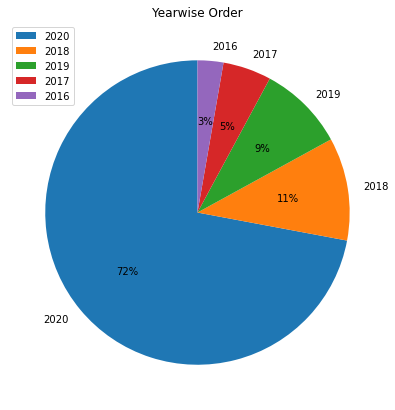

In [67]:
if output == 1:
    enter1()
elif output ==2:
    enter2()
elif output ==3:
    enter3()
elif output ==4:
    enter4()
elif output ==5:
    enter5()
elif output ==6:
    enter6()
elif output ==7:
    enter7()
elif output ==8:
    enter8()
elif output ==9:
    enter9()
elif output ==10:
    enter1()
    enter2()
    enter3()
    enter4()
    enter5()
    enter6()
    enter7()
    enter8()
    enter9()
else:
    print("Enter Valid Number")   